<a href="https://colab.research.google.com/github/nishika26/Implementation_practice/blob/main/Regression(Simple%2CMultiple%2CPolynomial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Linear Regression

In [ ]:
#importing all the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importing csv file
df=pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

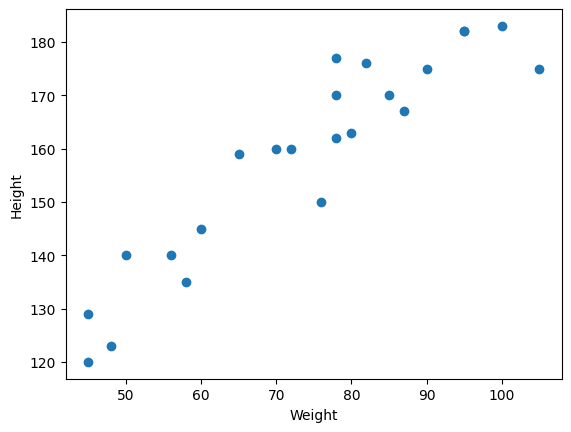

In [ ]:
#making a scatter plot
plt.scatter(x=df['Weight'],y=df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
#finding co-relation btw the variables

df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


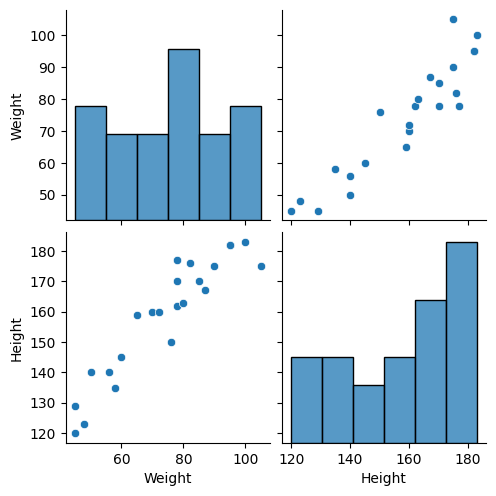

In [ ]:
#for visualization
import seaborn as sns
sns.pairplot(df)

In [ ]:
 #initializing independent and dependent variable
 X=df[['Weight']] #has to be in a dataframe(double square bracket makes it a dataframe) or 2d array
 y=df['Height']   #can be in a series or 1d array

In [ ]:
 np.array(X).shape

(23, 1)

In [ ]:
np.array(y).shape

(23,)

*Dataset is split into training data and testing data to avoid overfitting(which may be caused if the model will be trained by the whole dataset which may cause the model to become very specific and won't give the correct output with new unseen data)

In [ ]:
#train test splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

-"test_size" determines the portion of the data which will go into test sets.


-“random_state” is a parameter in train_test_split that controls the random number generator used to shuffle the data before splitting it. In other words, it ensures that the same randomization is used each time you run the code, resulting in the same splits of the data

In [ ]:
#Standardization(since units of all variables are diff and their range is diff as well):-
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

"transform" is used on the testing data because we don't want to re-fit the transformers to the testing data because that would introduce data leakage. Data leakage occurs when information from the testing data influences the model's decisions, making it perform unrealistically well on the test set but poorly on new, unseen data.

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
#Applying linear regression
from sklearn.linear_model import LinearRegression

When you set "n_jobs" to -1, it typically means that you want to utilize all available CPU cores or processors on your machine to perform the computation in parallel.

In [ ]:
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print("Coefficient/slope:",regression.coef_)
print("intercept:",regression.intercept_)

Coefficient/slope: [11.55753666]
intercept: 158.72727272727272


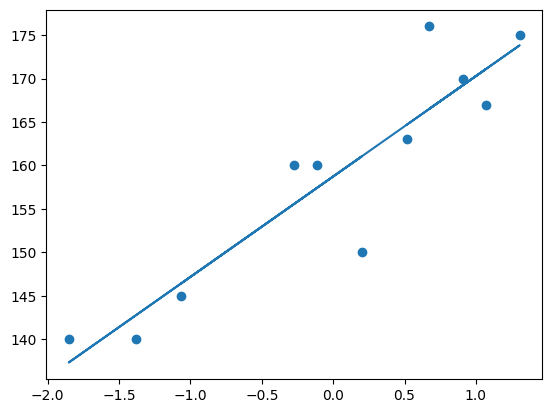

In [ ]:
#The best fit line along with the datapoints would look something like thie:-
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [ ]:
#predictions for the test data
y_pred=regression.predict(X_test)

In [ ]:
#Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mse=mean_squared_error(y_test,y_pred) #because applying more than one performance metrics won't hurt.
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

76.89357998062435
7.373706377857995
8.768898447389178


Applying R squared and adjusted R squared as well

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8607613455577643


In [ ]:
# we will have to write the formula for adjusted R squared:- ["len(y_test)"=no of data points, "X_test.shape"=no of features]
adjusted=1-((1-score)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1)
adjusted

0.8468374801135408



---



Till now we built the "gradient descent" version of linear regression, now we are gonna build an "ordinary least square" one:-

In [ ]:
import statsmodels.api as sm #"statsmodels" is a library used for estimating and interpreting statistical methods

In [ ]:
model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
prediction

array([  4.14998359,   4.14998359, -25.97889728,  19.67092222,
        -7.71896948,  28.80088612, -14.10994421,  24.23590417,
         4.14998359, -23.23990811,  19.67092222, -25.97889728])

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):             -0.094
Method:                 Least Squares   F-statistic:                            0.05297
Date:                Sat, 16 Sep 2023   Prob (F-statistic):                       0.823
Time:                        06:34:08   Log-Likelihood:                         -71.353
No. Observations:                  11   AIC:                                      144.7
Df Residuals:                      10   BIC:                                      145.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "




---



 If you've trained a model on standardized data, it's important to scale the new data consistently to ensure that the model's assumptions about feature scales remain valid , hence the "scaler.transform" with the given input :-

In [ ]:
#Testing out the prediction for new unseen data:-
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([157.39927798])

## Multiple Linear Regression

In [ ]:
df2=pd.read_csv("economic_index.csv")
df2

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [ ]:
#dropping unnecessary column:-
df2.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)  #adding the "inplace" means that we are making a fixed change

In [ ]:
df2.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

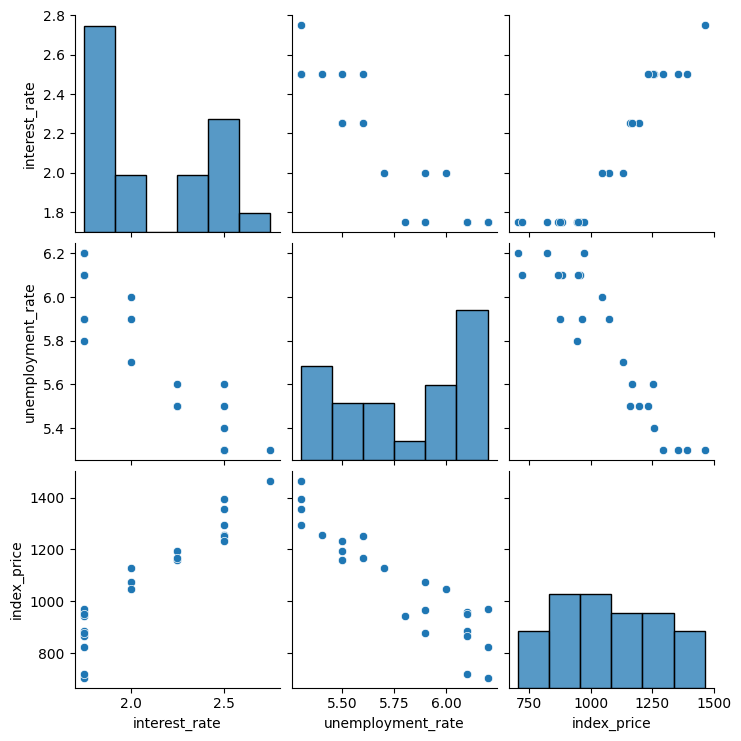

In [ ]:
sns.pairplot(df2)

In [ ]:
df2.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000
